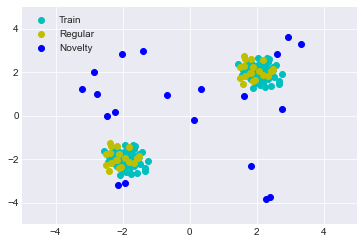

In [2]:
# 必要なライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid') 

# 乱数シードの固定
np.random.seed(1)

# 訓練データの生成
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# 正常なデータの生成
X = 0.3 * np.random.randn(20, 2)
X_regular = np.r_[X + 2, X - 2]

# 特異なデータの生成
X_novelty = np.random.uniform(low=-4, high=4, size=(20, 2))

# 擬似データの可視化
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c='c', label='Train')
plt.scatter(X_regular[:, 0], X_regular[:, 1], c='y', label='Regular')
plt.scatter(X_novelty[:, 0], X_novelty[:, 1], c='b', label='Novelty')
plt.legend(loc='upper left')
plt.show()

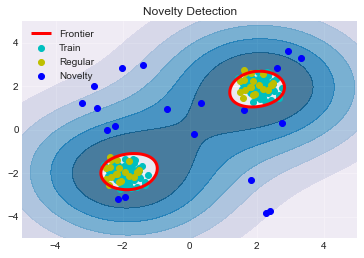

In [3]:
# 必要なライブラリのインポート
from sklearn import svm

# OneClass SVMの適用（RBFカーネルを適用）
model = svm.OneClassSVM(kernel='rbf', nu=0.01, gamma=0.1)
model.fit(X_train)

# 擬似データおよび特定した境界線（frontier）の可視化
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.xlim((-5, 5))
plt.ylim((-5, 5))

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu, alpha=0.7)
frontier = plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors='red')
train = plt.scatter(X_train[:, 0], X_train[:, 1], c='c')
normal = plt.scatter(X_regular[:, 0], X_regular[:, 1], c='y')
novelty = plt.scatter(X_novelty[:, 0], X_novelty[:, 1], c='b',)
plt.legend([frontier.collections[0], train, normal, novelty],
           ['Frontier','Train', 'Regular', 'Novelty'],
           loc='upper left',shadow=True)
plt.show()

In [4]:
# 構築したモデルによる予測
y_pred_train = model.predict(X_train)
y_pred_regular = model.predict(X_regular)
y_pred_novelty = model.predict(X_novelty)

# 誤検知のデータ数のカウント
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_regular = y_pred_regular[y_pred_regular == -1].size
n_error_novelty = y_pred_novelty[y_pred_novelty == 1].size

# 結果の出力
print(f'Error Train: {n_error_train}/200')
print(f'Error Regular: {n_error_regular}/40')
print(f'Error Novelty: {n_error_novelty}/40')

Error Train: 3/200
Error Regular: 3/40
Error Novelty: 0/40
